In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qv1vvcSUGUAc76t1ULww")
project = rf.workspace("cp-slnwa").project("nutrition-fact-detection-gxjub")
version = project.version(2)
dataset = version.download("yolov8-obb")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Nutrition-Fact-Detection-2 in yolov8-obb:: 100%|██████████| 9910/9910 [00:01<00:00, 5913.58it/s]


In [2]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
# Menyimpan lokasi dataset untuk digunakan nanti
dataset_location = dataset.location
print(f"Dataset telah diunduh ke: {dataset_location}")

Dataset telah diunduh ke: /content/Nutrition-Fact-Detection-2


In [5]:
import yaml
import os # Import the os module

# Path ke direktori root dataset
data_root = dataset_location

# Konten untuk file data.yaml
# Path train, val, test bersifat relatif terhadap lokasi file YAML ini
yaml_content = {
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 1,  # Number of classes
    'names': ['Nutrition Fact'] # Nama kelas
}

# Path lengkap untuk file data.yaml yang akan kita buat
yaml_file_path = os.path.join(data_root, 'data.yaml')

# Menulis konten ke file
with open(yaml_file_path, 'w') as f:
    yaml.dump(yaml_content, f, sort_keys=False)

print(f"File 'data.yaml' berhasil dibuat di: {yaml_file_path}")
print("\nIsi file:")
!cat {yaml_file_path}

File 'data.yaml' berhasil dibuat di: /content/Nutrition-Fact-Detection-2/data.yaml

Isi file:
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- Nutrition Fact


In [6]:
from ultralytics import YOLO

# 1. Muat pre-trained model YOLOv8 untuk OBB (Oriented Bounding Box)
# Kita mulai dengan model 'nano' (-obb) karena cepat dan ringan
model = YOLO('yolov8n-obb.pt')

# 2. Mulai proses training
results = model.train(
    # --- Konfigurasi Data & Model ---
    data=yaml_file_path,      # Path ke file data.yaml yang kita buat
    model='yolov8n-obb.pt',   # Pastikan model yang dilatih adalah versi OBB

    # --- Konfigurasi Training ---
    epochs=150,               # Jumlah epoch maksimal. Early stopping akan menghentikannya jika perlu.
    imgsz=640,                # Ukuran gambar input
    batch=16,                 # Ukuran batch, sesuaikan dengan VRAM GPU Anda

    # --- IMPLEMENTASI EARLY STOPPING ---
    patience=25,              # Hentikan training jika tidak ada peningkatan mAP selama 25 epoch.
                              # Set ke 0 untuk menonaktifkan.

    # --- Pengaturan Proyek & Eksperimen ---
    project='nutrition_fact_runs', # Nama folder untuk menyimpan hasil
    name='yolov8n_obb_exp1',  # Nama sub-folder spesifik untuk eksperimen ini
    exist_ok=True,            # Izinkan menimpa folder eksperimen yang sudah ada

    # --- Opsi Tambahan (Opsional) ---
    optimizer='AdamW',        # Pilihan optimizer
    lr0=0.01,                 # Initial learning rate
    seed=42                   # Untuk hasil yang dapat direproduksi
)

print("\nTraining selesai!")
print("Hasil training tersimpan di folder 'nutrition_fact_runs/yolov8n_obb_exp1'")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.26M/6.26M [00:00<00:00, 98.1MB/s]


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Nutrition-Fact-Detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_obb_exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=25, perspective=0.0, p

100%|██████████| 755k/755k [00:00<00:00, 23.9MB/s]

Overriding model.yaml nc=15 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-obb summary: 144 layers, 3,082,710 parameters, 3,082,694 gradients, 8.4 GFLOPs

Transferred 391/397 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 96.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 19.7±1.6 MB/s, size: 51.5 KB)


train: Scanning /content/Nutrition-Fact-Detection-2/train/labels... 4335 images, 3 backgrounds, 0 corrupt: 100%|██████████| 4335/4335 [00:05<00:00, 729.33it/s]


train: New cache created: /content/Nutrition-Fact-Detection-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 14.4±5.9 MB/s, size: 47.4 KB)


val: Scanning /content/Nutrition-Fact-Detection-2/valid/labels... 411 images, 0 backgrounds, 0 corrupt: 100%|██████████| 411/411 [00:00<00:00, 522.62it/s]

val: New cache created: /content/Nutrition-Fact-Detection-2/valid/labels.cache


Plotting labels to nutrition_fact_runs/yolov8n_obb_exp1/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to nutrition_fact_runs/yolov8n_obb_exp1
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.35G       1.32      1.111      2.665         45        640: 100%|██████████| 271/271 [01:24<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.98it/s]

                   all        411        424      0.849       0.83      0.894      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.37G       1.22     0.9742      2.561         37        640: 100%|██████████| 271/271 [01:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.90it/s]

                   all        411        424      0.891       0.89      0.934      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.39G      1.112     0.8967      2.468         40        640: 100%|██████████| 271/271 [01:16<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]

                   all        411        424      0.913      0.932      0.964      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150       2.4G      1.064      0.822      2.433         39        640: 100%|██████████| 271/271 [01:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.88it/s]

                   all        411        424      0.949      0.913      0.965      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.42G     0.9849     0.7702      2.371         40        640: 100%|██████████| 271/271 [01:17<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.81it/s]

                   all        411        424      0.971      0.955      0.971      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.44G     0.9458     0.7286      2.327         43        640: 100%|██████████| 271/271 [01:16<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.55it/s]

                   all        411        424      0.956      0.931      0.967      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.46G     0.9254     0.7049      2.312         46        640: 100%|██████████| 271/271 [01:16<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.92it/s]

                   all        411        424      0.919      0.935      0.948      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.47G     0.9035     0.6988      2.265         36        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.79it/s]

                   all        411        424      0.932      0.945      0.972      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.49G      0.875     0.6689      2.254         36        640: 100%|██████████| 271/271 [01:17<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.76it/s]

                   all        411        424      0.973      0.944      0.981      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.51G     0.8716     0.6638      2.242         46        640: 100%|██████████| 271/271 [01:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.90it/s]

                   all        411        424      0.976       0.94      0.968      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.53G     0.8368     0.6348      2.226         35        640: 100%|██████████| 271/271 [01:17<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.88it/s]

                   all        411        424      0.944      0.959       0.98      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.55G     0.8304     0.6329       2.19         39        640: 100%|██████████| 271/271 [01:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.86it/s]

                   all        411        424      0.969      0.955      0.977      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.56G     0.8267     0.6158      2.212         39        640: 100%|██████████| 271/271 [01:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.78it/s]

                   all        411        424      0.933      0.946      0.967      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.58G     0.8131     0.6045      2.206         40        640: 100%|██████████| 271/271 [01:17<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.83it/s]

                   all        411        424      0.967      0.963      0.983      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       2.6G     0.8139     0.6105      2.192         39        640: 100%|██████████| 271/271 [01:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.96it/s]

                   all        411        424      0.973      0.955       0.98      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.62G     0.7818     0.5803      2.184         35        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.65it/s]

                   all        411        424      0.966      0.974      0.983      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.63G     0.7667     0.5686      2.155         39        640: 100%|██████████| 271/271 [01:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.68it/s]

                   all        411        424      0.962      0.955      0.979      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.65G       0.77     0.5678      2.157         45        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.63it/s]

                   all        411        424      0.984      0.943      0.985      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.67G     0.7619     0.5643       2.14         36        640: 100%|██████████| 271/271 [01:19<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.84it/s]

                   all        411        424      0.982      0.946       0.98      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.69G     0.7494     0.5538      2.132         42        640: 100%|██████████| 271/271 [01:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.30it/s]

                   all        411        424      0.978      0.959      0.982      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.71G     0.7543     0.5594      2.139         54        640: 100%|██████████| 271/271 [01:19<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.79it/s]

                   all        411        424      0.985      0.945      0.978      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.72G     0.7464     0.5537      2.144         33        640: 100%|██████████| 271/271 [01:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.81it/s]

                   all        411        424      0.974      0.964      0.984      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.74G     0.7422     0.5541       2.12         39        640: 100%|██████████| 271/271 [01:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.93it/s]

                   all        411        424      0.978      0.958      0.985      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.76G     0.7293     0.5476      2.116         37        640: 100%|██████████| 271/271 [01:19<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.71it/s]

                   all        411        424      0.985      0.957      0.986      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.78G      0.737     0.5436      2.119         47        640: 100%|██████████| 271/271 [01:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.95it/s]

                   all        411        424      0.988      0.967      0.987      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.79G     0.7238     0.5363      2.109         37        640: 100%|██████████| 271/271 [01:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.84it/s]


                   all        411        424      0.966      0.953      0.984      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.81G     0.7364     0.5466      2.128         37        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.49it/s]

                   all        411        424       0.99      0.958      0.986      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.83G      0.718     0.5287       2.11         47        640: 100%|██████████| 271/271 [01:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.59it/s]

                   all        411        424      0.976      0.946      0.984        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.85G     0.7097     0.5241      2.114         38        640: 100%|██████████| 271/271 [01:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.70it/s]

                   all        411        424      0.972      0.974      0.984      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.87G      0.712      0.523      2.091         39        640: 100%|██████████| 271/271 [01:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.73it/s]

                   all        411        424      0.978      0.976      0.987      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.88G        0.7     0.5172      2.106         47        640: 100%|██████████| 271/271 [01:18<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.76it/s]

                   all        411        424      0.974       0.96      0.979      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150       2.9G     0.7014      0.523      2.097         40        640: 100%|██████████| 271/271 [01:18<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.86it/s]

                   all        411        424      0.962      0.958      0.981       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.92G     0.6999     0.5182      2.084         42        640: 100%|██████████| 271/271 [01:18<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.67it/s]

                   all        411        424      0.971      0.965      0.988      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.94G     0.6999     0.5036      2.086         40        640: 100%|██████████| 271/271 [01:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.84it/s]

                   all        411        424      0.986      0.941      0.984      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.95G     0.6965     0.5127      2.082         43        640: 100%|██████████| 271/271 [01:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.81it/s]

                   all        411        424      0.969      0.963      0.985      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.97G     0.6829     0.5032      2.088         33        640: 100%|██████████| 271/271 [01:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.77it/s]

                   all        411        424      0.983      0.953      0.985      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.99G     0.6824     0.5013      2.071         43        640: 100%|██████████| 271/271 [01:19<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.15it/s]

                   all        411        424      0.975      0.972      0.987       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.01G     0.6769     0.5006      2.068         36        640: 100%|██████████| 271/271 [01:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.36it/s]

                   all        411        424      0.974      0.972      0.985      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.02G     0.6779     0.4971      2.062         45        640: 100%|██████████| 271/271 [01:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.85it/s]

                   all        411        424      0.976      0.969      0.986      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.04G     0.6648     0.4886      2.048         37        640: 100%|██████████| 271/271 [01:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.81it/s]

                   all        411        424      0.976      0.959      0.985      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.06G     0.6655     0.4923      2.055         35        640: 100%|██████████| 271/271 [01:19<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.75it/s]

                   all        411        424       0.97      0.967      0.986      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.08G     0.6588     0.4909      2.054         38        640: 100%|██████████| 271/271 [01:19<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.90it/s]

                   all        411        424      0.972      0.968      0.985      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       3.1G     0.6619     0.4757      2.061         41        640: 100%|██████████| 271/271 [01:19<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.83it/s]

                   all        411        424      0.977      0.979      0.989      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.11G     0.6526     0.4835      2.056         40        640: 100%|██████████| 271/271 [01:20<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.77it/s]

                   all        411        424      0.986      0.972      0.989      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.13G     0.6564     0.4881       2.06         40        640: 100%|██████████| 271/271 [01:20<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.76it/s]

                   all        411        424      0.981      0.965      0.984       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.15G     0.6487     0.4761      2.042         38        640: 100%|██████████| 271/271 [01:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.08it/s]

                   all        411        424      0.988      0.964      0.986      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.17G     0.6511     0.4858      2.053         37        640: 100%|██████████| 271/271 [01:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.27it/s]

                   all        411        424      0.975      0.967      0.987      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.18G     0.6329     0.4623      2.015         32        640: 100%|██████████| 271/271 [01:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.83it/s]

                   all        411        424      0.986      0.958      0.988      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       3.2G     0.6372     0.4752      2.039         34        640: 100%|██████████| 271/271 [01:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.75it/s]

                   all        411        424       0.99      0.979      0.989      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.22G     0.6373     0.4781      2.052         37        640: 100%|██████████| 271/271 [01:20<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.74it/s]

                   all        411        424      0.986      0.963      0.988      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.24G     0.6351     0.4694      2.035         44        640: 100%|██████████| 271/271 [01:19<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.75it/s]

                   all        411        424      0.982      0.967      0.988       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      3.25G     0.6187     0.4621      2.008         33        640: 100%|██████████| 271/271 [01:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.64it/s]

                   all        411        424      0.983      0.971      0.989      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      3.27G     0.6324     0.4676      2.035         46        640: 100%|██████████| 271/271 [01:20<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.76it/s]

                   all        411        424      0.979      0.973       0.99      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      3.29G     0.6274      0.468      2.028         37        640: 100%|██████████| 271/271 [01:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.82it/s]

                   all        411        424      0.989      0.976      0.984      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.31G     0.6241     0.4604      2.021         45        640: 100%|██████████| 271/271 [01:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.80it/s]

                   all        411        424      0.978      0.976      0.988      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      3.32G     0.6229      0.459      1.994         45        640: 100%|██████████| 271/271 [01:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.71it/s]

                   all        411        424      0.985      0.967      0.988      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      3.34G      0.616     0.4569      2.002         36        640: 100%|██████████| 271/271 [01:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.73it/s]

                   all        411        424      0.981      0.971      0.988      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      3.36G     0.6099     0.4533      1.982         39        640: 100%|██████████| 271/271 [01:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.84it/s]

                   all        411        424       0.99       0.97      0.992      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      3.38G     0.6107     0.4568       2.01         32        640: 100%|██████████| 271/271 [01:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.95it/s]

                   all        411        424      0.983      0.964      0.989      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150       3.4G     0.6077      0.444      2.019         35        640: 100%|██████████| 271/271 [01:18<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]

                   all        411        424      0.989      0.967       0.99      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      3.41G     0.6145     0.4505      2.015         42        640: 100%|██████████| 271/271 [01:18<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.81it/s]

                   all        411        424      0.972      0.985      0.989      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      3.43G     0.5976     0.4446      2.006         51        640: 100%|██████████| 271/271 [01:18<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.83it/s]

                   all        411        424      0.992      0.976      0.988      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      3.45G     0.6058     0.4405      1.999         34        640: 100%|██████████| 271/271 [01:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.03it/s]


                   all        411        424       0.98      0.974      0.988      0.872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      3.47G      0.599     0.4411      2.001         50        640: 100%|██████████| 271/271 [01:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.52it/s]

                   all        411        424      0.972      0.978       0.99      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      3.48G     0.5962     0.4457      2.001         40        640: 100%|██████████| 271/271 [01:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.95it/s]

                   all        411        424      0.987      0.979      0.994      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       3.5G     0.5982      0.445      2.024         36        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.78it/s]

                   all        411        424      0.976      0.973       0.99      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      3.52G     0.5943     0.4426      1.998         44        640: 100%|██████████| 271/271 [01:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.87it/s]

                   all        411        424      0.967      0.978      0.988       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      3.54G     0.5844     0.4361      1.984         46        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.59it/s]

                   all        411        424      0.968      0.987      0.992      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      3.55G     0.5816     0.4309      1.988         40        640: 100%|██████████| 271/271 [01:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.72it/s]

                   all        411        424       0.99      0.972      0.991       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      3.57G     0.5863      0.436      1.978         40        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.04it/s]

                   all        411        424      0.987      0.976       0.99      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      3.59G     0.5828     0.4303       1.98         38        640: 100%|██████████| 271/271 [01:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.88it/s]

                   all        411        424      0.985      0.974      0.991      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      3.61G     0.5791      0.431      1.984         37        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.85it/s]

                   all        411        424      0.986      0.971       0.99      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      3.62G     0.5804     0.4261      1.977         39        640: 100%|██████████| 271/271 [01:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.99it/s]

                   all        411        424      0.967      0.979      0.992      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      3.64G     0.5701     0.4187      1.979         36        640: 100%|██████████| 271/271 [01:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.84it/s]

                   all        411        424      0.996      0.962      0.988      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      3.66G     0.5759      0.423      1.962         40        640: 100%|██████████| 271/271 [01:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.86it/s]

                   all        411        424      0.984      0.981      0.991      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      3.68G     0.5808     0.4307      1.959         36        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.71it/s]

                   all        411        424      0.988      0.979       0.99      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       3.7G     0.5682     0.4158      1.966         42        640: 100%|██████████| 271/271 [01:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.80it/s]

                   all        411        424      0.977      0.981      0.994      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      3.71G     0.5738     0.4245      1.988         36        640: 100%|██████████| 271/271 [01:17<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.84it/s]

                   all        411        424      0.985      0.976      0.992      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      3.73G     0.5758     0.4264      1.978         47        640: 100%|██████████| 271/271 [01:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.09it/s]

                   all        411        424      0.992      0.969      0.994      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      3.75G     0.5646     0.4142      1.972         36        640: 100%|██████████| 271/271 [01:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.14it/s]

                   all        411        424       0.99      0.981      0.991      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      3.77G     0.5674      0.418      1.968         45        640: 100%|██████████| 271/271 [01:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.77it/s]

                   all        411        424      0.988      0.987       0.99      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      3.79G     0.5575     0.4068      1.966         45        640: 100%|██████████| 271/271 [01:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.78it/s]

                   all        411        424       0.99       0.98      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150       3.8G       0.56     0.4131      1.967         42        640: 100%|██████████| 271/271 [01:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.87it/s]

                   all        411        424      0.988      0.987      0.989      0.875
EarlyStopping: Training stopped early as no improvement observed in last 25 epochs. Best results observed at epoch 58, best model saved as best.pt.
To update EarlyStopping(patience=25) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



83 epochs completed in 1.935 hours.
Optimizer stripped from nutrition_fact_runs/yolov8n_obb_exp1/weights/last.pt, 6.6MB
Optimizer stripped from nutrition_fact_runs/yolov8n_obb_exp1/weights/best.pt, 6.6MB

Validating nutrition_fact_runs/yolov8n_obb_exp1/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 81 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]


                   all        411        424       0.99       0.97      0.992      0.888
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to nutrition_fact_runs/yolov8n_obb_exp1

Training selesai!
Hasil training tersimpan di folder 'nutrition_fact_runs/yolov8n_obb_exp1'


In [7]:
# Path ke bobot model terbaik yang disimpan
path_to_best_weights = 'nutrition_fact_runs/yolov8n_obb_exp1/weights/best.pt'

# Muat model terbaik
model = YOLO(path_to_best_weights)

# Jalankan validasi pada test set
# Pastikan 'test: test/images' ada di data.yaml Anda
metrics = model.val(split='test')

print("\n--- Hasil Evaluasi pada Test Set ---")
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 81 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 73.4±134.5 MB/s, size: 53.5 KB)


val: Scanning /content/Nutrition-Fact-Detection-2/test/labels... 203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<00:00, 705.58it/s]

val: New cache created: /content/Nutrition-Fact-Detection-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]


                   all        203        204       0.98      0.984       0.99      0.874
Speed: 5.1ms preprocess, 5.3ms inference, 0.0ms loss, 10.0ms postprocess per image
Results saved to runs/obb/val

--- Hasil Evaluasi pada Test Set ---
mAP50-95: 0.873845131782125
mAP50: 0.9895083721774909
mAP75: 0.9542603281084407


Menampilkan 3 hasil deteksi dan crop acak dari test set...

image 1/1 /content/Nutrition-Fact-Detection-2/test/images/IMG_20241122_145446_424_jpg.rf.8a55f7469e7b3db621ec22bc6462a106.jpg: 640x640 None12.4ms
Speed: 2.8ms preprocess, 12.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


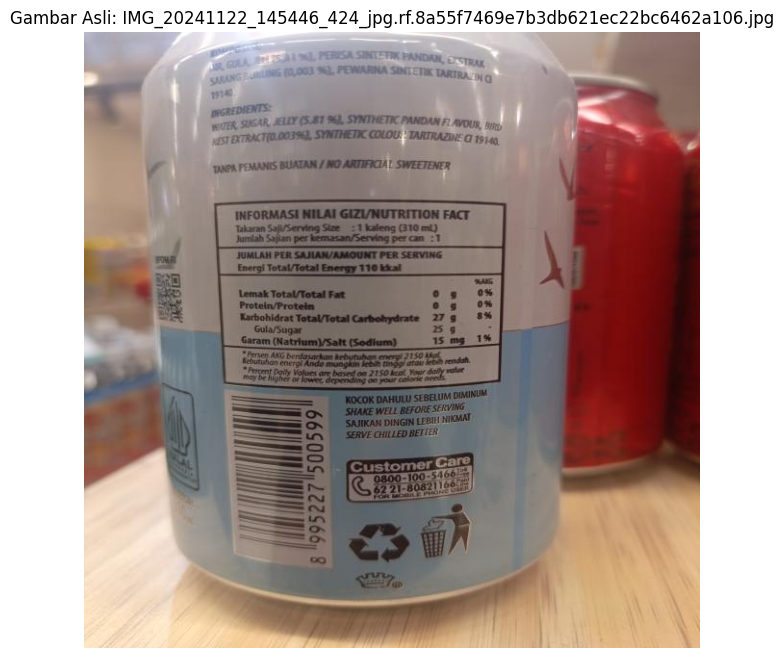

Ditemukan 1 'Nutrition Fact' pada gambar. Menampilkan hasil crop:


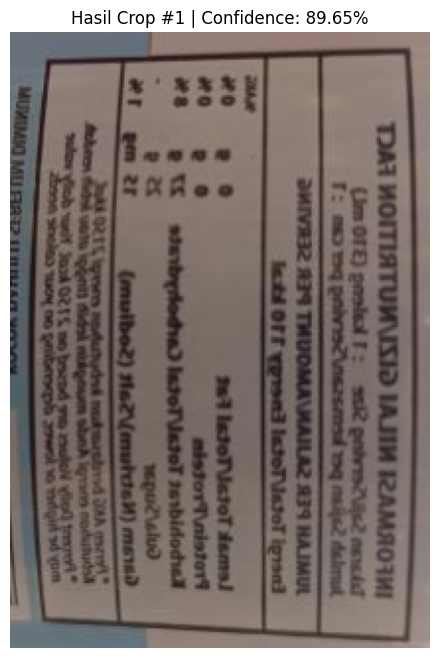

------------------------------

image 1/1 /content/Nutrition-Fact-Detection-2/test/images/image_10_jpg.rf.929740711f694560c8bfab60354ab3b0.jpg: 640x640 None9.3ms
Speed: 3.1ms preprocess, 9.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


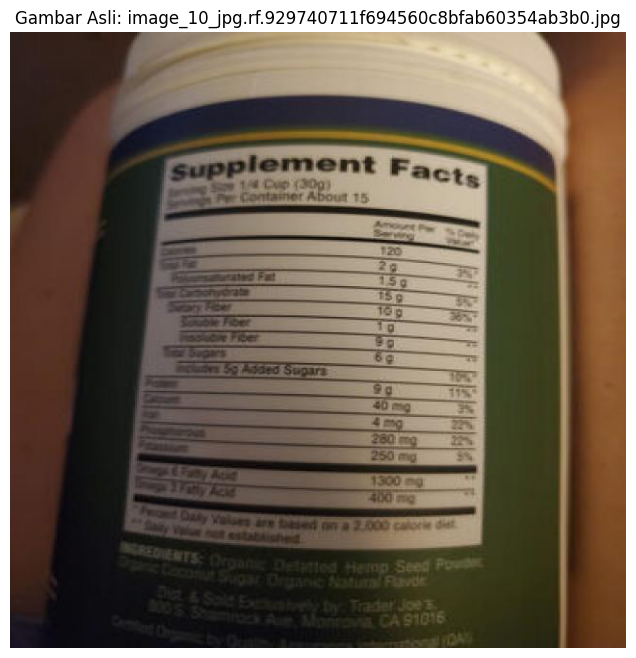

Ditemukan 1 'Nutrition Fact' pada gambar. Menampilkan hasil crop:


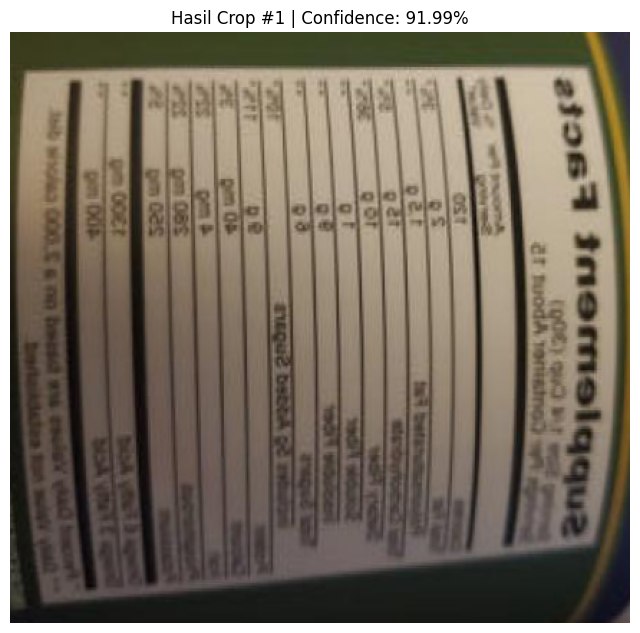

------------------------------

image 1/1 /content/Nutrition-Fact-Detection-2/test/images/image_339_jpg.rf.4ee33f5bb3004e1e238d0ca76b041ecd.jpg: 640x640 None32.9ms
Speed: 6.2ms preprocess, 32.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


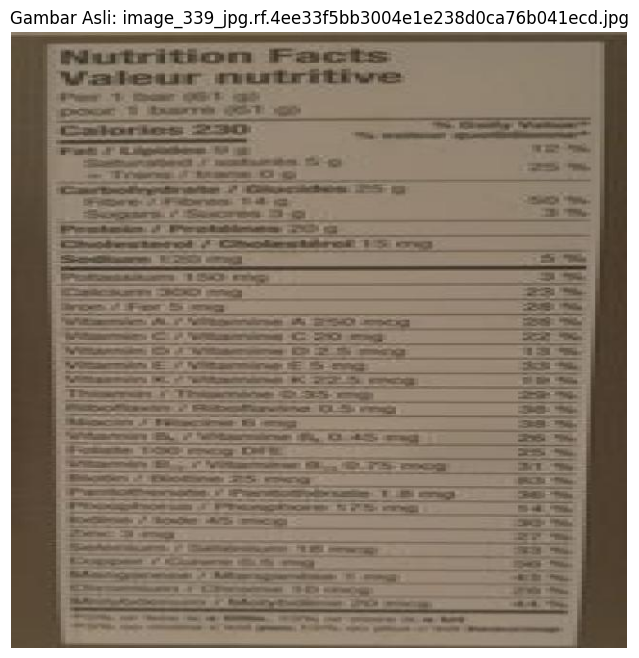

Ditemukan 1 'Nutrition Fact' pada gambar. Menampilkan hasil crop:


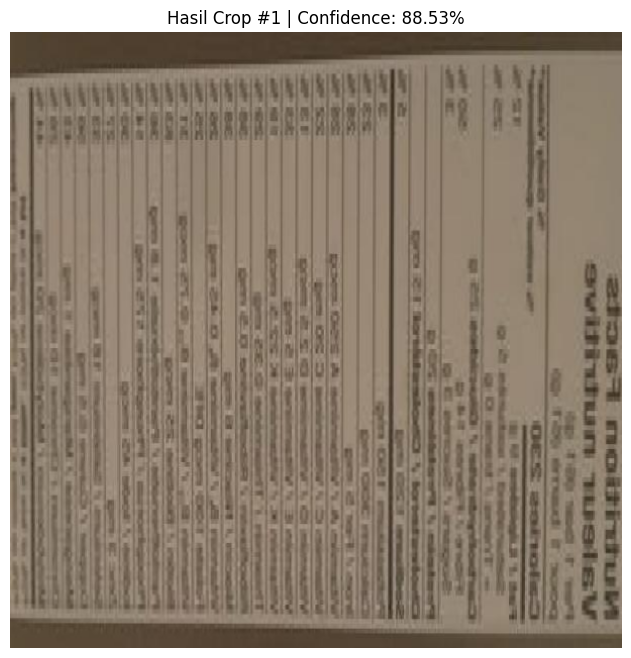

------------------------------


In [13]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np # Kita akan butuh numpy untuk kalkulasi

# --- 1. Tentukan Lokasi Gambar Uji ---
test_images_path = os.path.join(dataset_location, 'test/images')
image_files = os.listdir(test_images_path)

# --- 2. Ambil Beberapa Contoh Gambar Secara Acak ---
num_samples = min(3, len(image_files)) # Ambil 3 sampel saja agar tidak terlalu banyak output
sample_images = random.sample(image_files, num_samples)

print(f"Menampilkan {num_samples} hasil deteksi dan crop acak dari test set...")

# --- 3. Lakukan Prediksi, Crop, dan Tampilkan Hasilnya ---
for image_file in sample_images:
    # Path lengkap ke gambar
    image_path = os.path.join(test_images_path, image_file)

    # Muat gambar asli menggunakan OpenCV
    original_image = cv2.imread(image_path)

    # Lakukan prediksi pada gambar
    results = model.predict(source=image_path)

    # Tampilkan gambar asli
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Gambar Asli: {image_file}")
    plt.axis('off')
    plt.show()

    # Cek apakah ada objek yang terdeteksi
    if results[0].obb is not None and len(results[0].obb.xyxyxyxy) > 0:
        print(f"Ditemukan {len(results[0].obb.xyxyxyxy)} 'Nutrition Fact' pada gambar. Menampilkan hasil crop:")

        # Loop untuk setiap bounding box yang terdeteksi
        # enumerate(results[0].obb) memberikan akses ke setiap objek box tunggal
        for i, box in enumerate(results[0].obb):
            # Ambil 4 titik sudut dari oriented bounding box
            corners = box.xyxyxyxy[0].cpu().numpy().astype(np.float32)

            # === BARIS BARU: Ambil confidence score ===
            confidence = box.conf[0].item() # .item() untuk mengubah tensor 0D menjadi angka python biasa

            # Hitung lebar dan tinggi dari bounding box yang miring
            width = int(np.linalg.norm(corners[0] - corners[1]))
            height = int(np.linalg.norm(corners[1] - corners[2]))

            # Tentukan titik tujuan untuk transformasi (persegi panjang lurus)
            dst_pts = np.array([[0, 0],
                                [width - 1, 0],
                                [width - 1, height - 1],
                                [0, height - 1]], dtype="float32")

            # Hitung matriks transformasi perspektif
            M = cv2.getPerspectiveTransform(corners, dst_pts)

            # Lakukan warp perspective untuk mendapatkan gambar yang di-crop dan diluruskan
            warped_image = cv2.warpPerspective(original_image, M, (width, height))

            # Tampilkan gambar yang sudah di-crop
            plt.figure(figsize=(8, 8))
            plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))

            # === BARIS DIMODIFIKASI: Tambahkan confidence score ke judul ===
            plt.title(f"Hasil Crop #{i+1} | Confidence: {confidence:.2%}") # Format sebagai persentase

            plt.axis('off')
            plt.show()
    else:
        print("Tidak ada 'Nutrition Fact' yang terdeteksi pada gambar ini.")

    print("-" * 30)